## <center>HUMAN ACTIVITY RECOGNITION USING SMARTPHONE DATA</center>

### Table of Contents

1. Importing necessary libraries
2. Loading Data
3. Data preprocessing
    * 3.a Checking for Duplicates
    * 3.b Checking for missing values
    * 3.c Checking for class imbalance
4. Exploratory Data Analysis
    * 4.a Analysing tbodyAccMag-mean feature
    * 4.b Analysing Angle between Y-axis and gravityMean feature
    * 4.c Analysing Angle between Y-axis and gravityMean feature
    * 4.d Visualising data using t-SNE
5. Model Prediction and Evaluation 
    * 5.a Logistic Regression model with Hyperparameter tuning and cross validation
    * 5.b Linear SVM model with Hyperparameter tuning and cross validation
    * 5.c Kernel SVM model with Hyperparameter tuning and cross validation
    * 5.d Decision tree model with Hyperparameter tuning and cross validation
    * 5.e Random Forest model with Hyperparameter tuning and cross validation

### 1. Importing the libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from collections import Counter

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 


### 2. Loading the Data

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [5]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [6]:
train.subject.value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

### 3. Data Preprocessing

##### 3.a Checking of duplicates

In [7]:
print('Number of duplicates in train:' , sum(train.duplicated())) 
print('Number of duplicates in test:' , sum(test.duplicated())) 

Number of duplicates in train: 0
Number of duplicates in test: 0


##### 3.b Checking for missing values

In [10]:
print('Total number of missing values in train:' , train.isna().values.sum()) 
print('Total number of missing values in test:' , test.isna().values.sum()) 

Total number of missing values in train: 0
Total number of missing values in test: 0


##### 3.c Checking for class imbalance

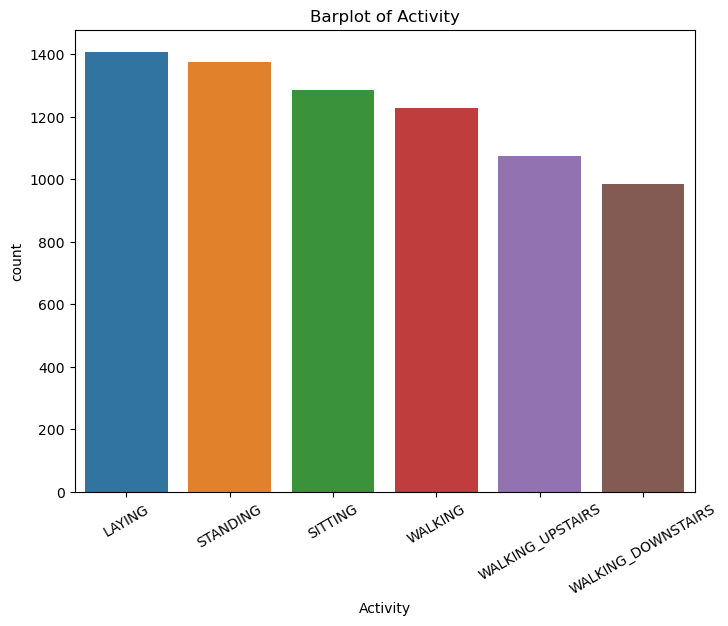

In [12]:
plt.figure(figsize = (8,6))
plt.title('Barplot of Activity')
sns.countplot(train.Activity, order = train.Activity.value_counts().index)
plt.xticks(rotation = 30)
plt.show()

##### There is almost same number of observations across all the six acivities so this data does not have class imbalance

### 4. Exploratory Data Analysis

In [13]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [16]:
Counter([col.split('-')[0].split('(')[0] for col in train.columns])

Counter({'tBodyAcc': 40,
         'tGravityAcc': 40,
         'tBodyAccJerk': 40,
         'tBodyGyro': 40,
         'tBodyGyroJerk': 40,
         'tBodyAccMag': 13,
         'tGravityAccMag': 13,
         'tBodyAccJerkMag': 13,
         'tBodyGyroMag': 13,
         'tBodyGyroJerkMag': 13,
         'fBodyAcc': 79,
         'fBodyAccJerk': 79,
         'fBodyGyro': 79,
         'fBodyAccMag': 13,
         'fBodyBodyAccJerkMag': 13,
         'fBodyBodyGyroMag': 13,
         'fBodyBodyGyroJerkMag': 13,
         'angle': 7,
         'subject': 1,
         'Activity': 1})

In [17]:
[col.split('-')[0].split('(')[0] for col in train.columns]

['tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tBodyAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',
 'tGravityAcc',


In [19]:
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]), orient="index").rename(columns = {0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


##### 4.a Analysing tBodyAccMag-mean() feature

Text(0.1, 9, 'Dynamic Activities')

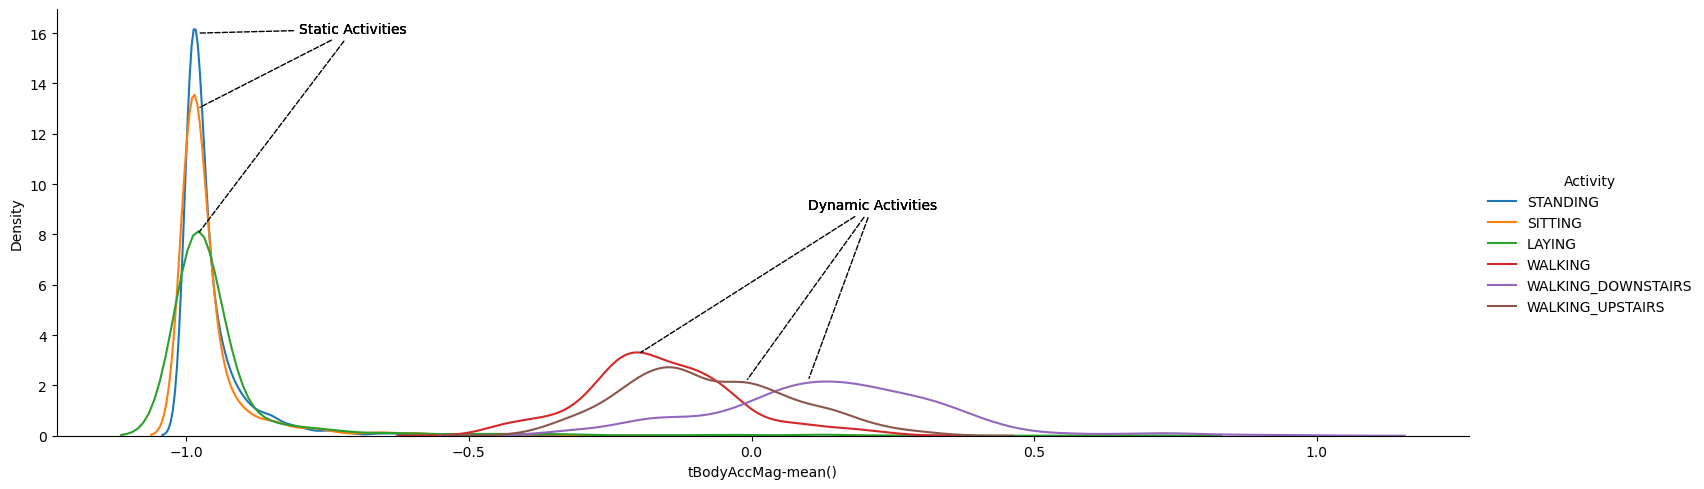

In [28]:
facetgrid = sns.FacetGrid(train, hue = 'Activity', height=5, aspect=3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate("Static Activities", xy = (-.98,8), xytext = (-.8,16), arrowprops={'arrowstyle': '-', 'ls' : 'dashed'})
plt.annotate("Static Activities", xy = (-.98,13), xytext = (-.8,16), arrowprops={'arrowstyle': '-', 'ls' : 'dashed'})
plt.annotate("Static Activities", xy = (-.98,16), xytext = (-.8,16), arrowprops={'arrowstyle': '-', 'ls' : 'dashed'})

plt.annotate("Dynamic Activities", xy = (-0.2,3.25), xytext = (0.1,9), arrowprops={'arrowstyle': '-', 'ls' : 'dashed'})
plt.annotate("Dynamic Activities", xy = (0.1,2.18), xytext = (0.1,9), arrowprops={'arrowstyle': '-', 'ls' : 'dashed'})
plt.annotate("Dynamic Activities", xy = (-0.01,2.15), xytext = (0.1,9), arrowprops={'arrowstyle': '-', 'ls' : 'dashed'})

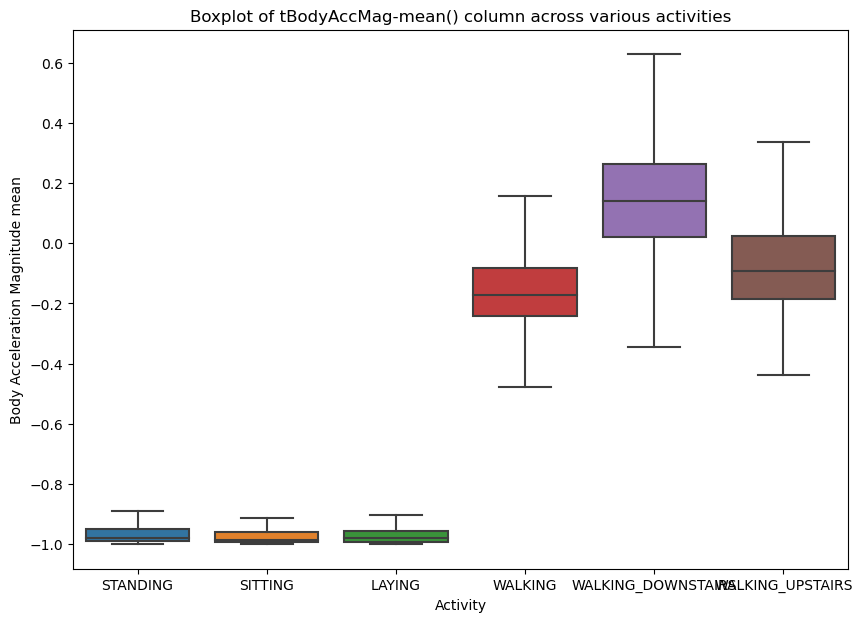

In [30]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "Activity", y = "tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.show()

##### 4.b Analysing Angle between Y-axis and gravityMean feature

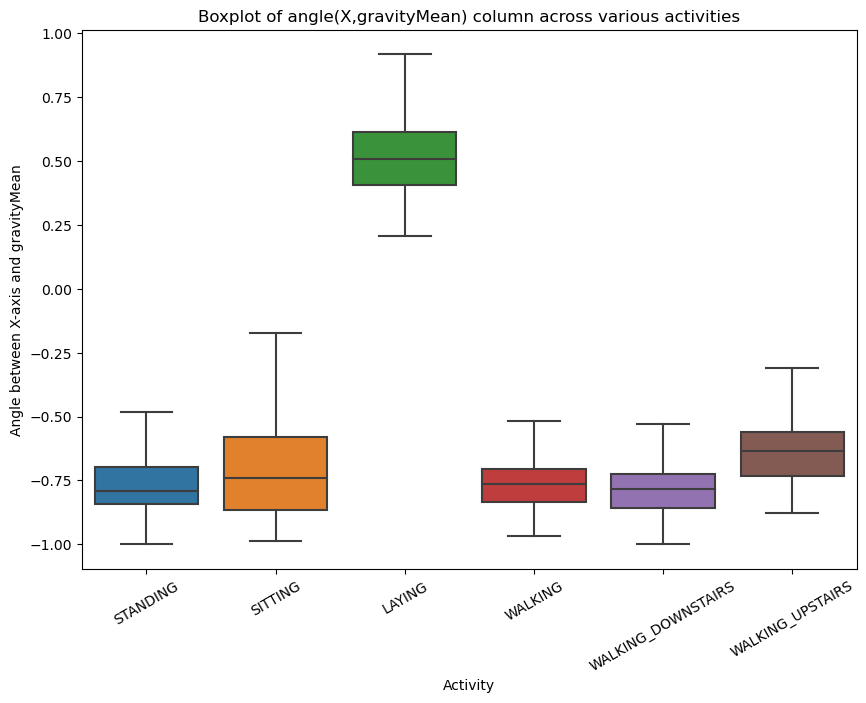

In [33]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "Activity", y = "angle(X,gravityMean)", data = train, showfliers = False)
plt.ylabel('Angle between X-axis and gravityMean')
plt.title("Boxplot of angle(X,gravityMean) column across various activities")
plt.xticks(rotation = 30)
plt.show()

##### 4.c Analysing Angle between Y-axis and gravityMean feature

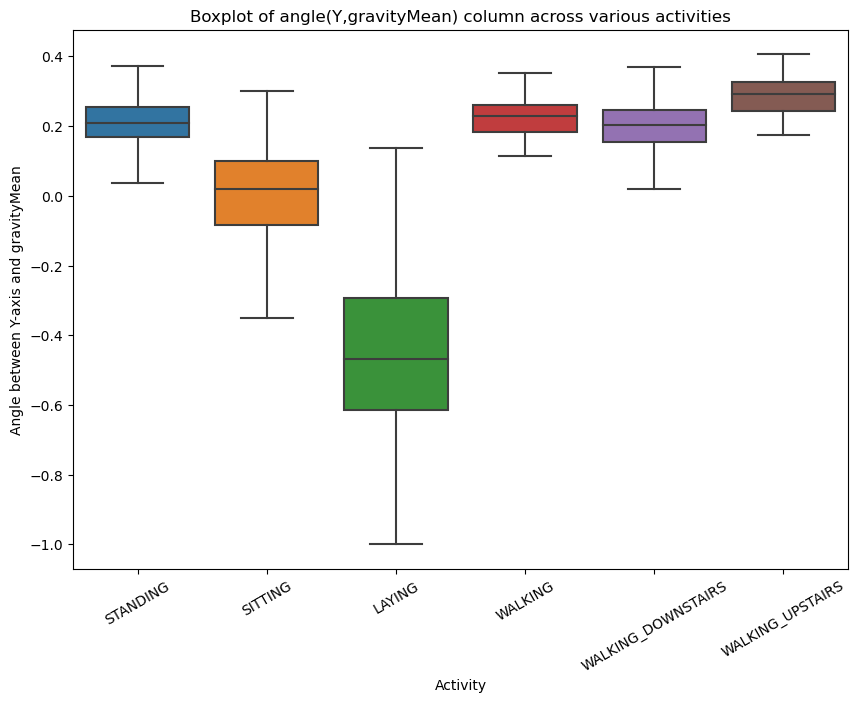

In [34]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "Activity", y = "angle(Y,gravityMean)", data = train, showfliers = False)
plt.ylabel('Angle between Y-axis and gravityMean')
plt.title("Boxplot of angle(Y,gravityMean) column across various activities")
plt.xticks(rotation = 30)
plt.show()

##### 4.d Visualising data using PCA

Using PCA data can be visualised from a extremely high dimensional space to a low dimensional space and it retains a lot of actual information.
Given training data has 561 unique features, using pca to visualise it to a 2D space

In [36]:
x_for_pca = train.drop(['subject', 'Activity'], axis = 1)
pca = PCA(n_components=2, random_state=0).fit_transform(x_for_pca)

In [37]:
pca

array([[-5.5202803 , -0.29027701],
       [-5.53534954, -0.08253011],
       [-5.47498801,  0.28738703],
       ...,
       [ 5.85750527, -3.08184312],
       [ 5.42109482, -3.42643002],
       [ 5.49797027, -2.78992867]])

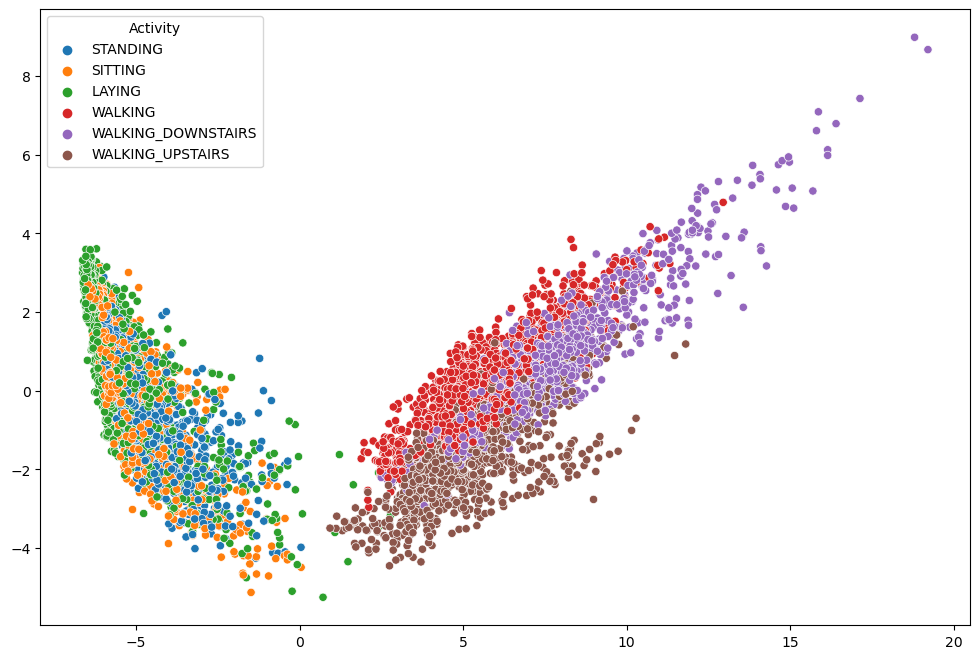

In [39]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = pca[:,0], y = pca[:, 1], hue = train['Activity'])
plt.show()

##### 4.d Visualising data using t-SNE

Using t-SNE data can be visualised from a extremely high dimesnsional space to a low dimensional space and it still retains a lot of actual information.


In [41]:
x_for_tsne = train.drop(['subject', 'Activity'], axis = 1)
tsne = TSNE(n_components=2, random_state=0, n_iter=1000).fit_transform(x_for_tsne)

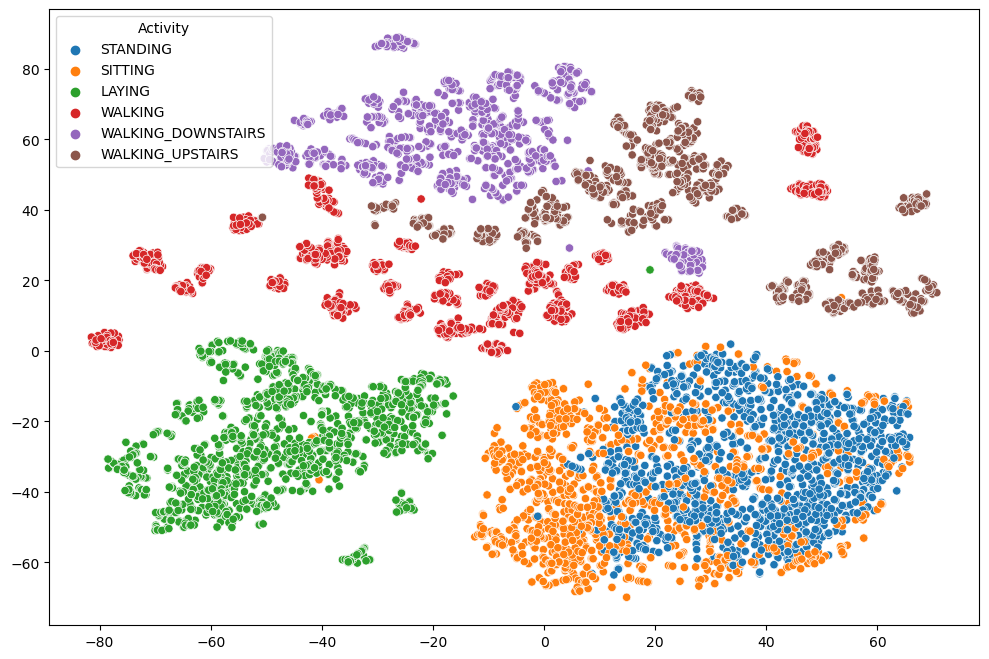

In [42]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = tsne[:,0], y = tsne[:, 1], hue = train['Activity'])
plt.show()

### 5. ML Models

##### Getting training and test data ready

In [45]:
Xtrain = train.drop(['subject', 'Activity'], axis = 1)
Ytrain = train.Activity

Xtest = test.drop(['subject', 'Activity'], axis = 1)
Ytest = test.Activity

In [46]:
print('Training data size:', Xtrain.shape)
print('Test data size:', Xtest.shape)

Training data size: (7352, 561)
Test data size: (999, 561)


##### 5.a Logistic Regression with Hyperparameter tuning and cross validation

In [52]:
parameters = {'max_iter': [100,200,500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 5, random_state=42)
lr_classifier_rs.fit(Xtrain,Ytrain)
y_pred_lr = lr_classifier_rs.predict(Xtest)

In [53]:
lr_accuracy = accuracy_score(y_true = Ytest, y_pred = y_pred_lr)
print("Accuracy using Logistic Regression", lr_accuracy)

Accuracy using Logistic Regression 0.954954954954955


In [54]:
cm = confusion_matrix(Ytest.values, y_pred_lr)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

In [55]:
# function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator:", model.best_estimator_)
    print("Best set of parameters:", model.best_params_)

In [56]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator: LogisticRegression(max_iter=500)
Best set of parameters: {'max_iter': 500}


##### 5.c Kernel SVM model with Hyperparameter tuning and cross validation

In [57]:
parameters = {
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
    'C' : [100,50]
}

svm_rs = RandomizedSearchCV(SVC(), param_distributions = parameters, cv = 3, random_state=42)
svm_rs.fit(Xtrain, Ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [58]:
y_pred = svm_rs.predict(Xtest)

In [59]:
kernel_svm_accuracy = accuracy_score(y_true = Ytest, y_pred = y_pred)
print("Accuracy using Kernel SVM", kernel_svm_accuracy)

Accuracy using Kernel SVM 0.965965965965966


In [60]:
cm = confusion_matrix(Ytest.values, y_pred)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 149,  19,   0,   0,   2],
       [  0,   7, 171,   0,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,   6,   0, 143]], dtype=int64)

In [61]:
get_best_randomsearch_results(svm_rs)

Best estimator: SVC(C=50)
Best set of parameters: {'kernel': 'rbf', 'C': 50}
